<a href="https://colab.research.google.com/github/Kashfianaz/CNN-code/blob/main/CNN_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-metrics

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import keras_metrics as km

Num GPUs Available:  0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Here's our 28 categories that we have to classify.
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Nothing', 'Space']

In [ ]:
# Traing Dataset
trainset = [class_names[0],class_names[1],class_names[2],class_names[3],class_names[4],class_names[5],class_names[6],class_names[7],class_names[8],class_names[9],class_names[10],class_names[11],class_names[12],class_names[13],class_names[14],class_names[15],class_names[16],class_names[17],class_names[18],class_names[19],class_names[20],class_names[21],class_names[22],class_names[23],class_names[24],class_names[25],class_names[26],class_names[27]]
for i in range(len(class_names)):
    trainset[i] = os.path.join('/content/drive/MyDrive/ASL_Dataset/Train',class_names[i])
print("Size of each class of Training Set: ")
for i in range(len(trainset)):
    print(class_names[i],' has ',len(os.listdir(trainset[i])), 'instances.')

Size of each class of Training Set: 
A  has  158 instances.
B  has  163 instances.
C  has  183 instances.
D  has  233 instances.
E  has  193 instances.
F  has  182 instances.
G  has  201 instances.
H  has  175 instances.
I  has  175 instances.
J  has  188 instances.
K  has  158 instances.
L  has  150 instances.
M  has  160 instances.
N  has  145 instances.
O  has  161 instances.
P  has  146 instances.
Q  has  211 instances.
R  has  185 instances.
S  has  221 instances.
T  has  206 instances.
U  has  250 instances.
V  has  194 instances.
W  has  232 instances.
X  has  185 instances.
Y  has  199 instances.
Z  has  191 instances.
Nothing  has  186 instances.
Space  has  171 instances.


In [ ]:
#Test Dataset
testset = [class_names[0],class_names[1],class_names[2],class_names[3],class_names[4],class_names[5],class_names[6],class_names[7],class_names[8],class_names[9],class_names[10],class_names[11],class_names[12],class_names[13],class_names[14],class_names[15],class_names[16],class_names[17],class_names[18],class_names[19],class_names[20],class_names[21],class_names[22],class_names[23],class_names[24],class_names[25],class_names[26],class_names[27]]
for i in range(len(class_names)):
    testset[i] = os.path.join('/content/drive/MyDrive/ASL_Dataset/Test',class_names[i])
print("\nSize of each class of Test Set: ")
for i in range(len(testset)):
    print(class_names[i],' has ',len(os.listdir(testset[i])), 'instances.')


Size of each class of Test Set: 
A  has  53 instances.
B  has  43 instances.
C  has  47 instances.
D  has  59 instances.
E  has  49 instances.
F  has  4 instances.
G  has  41 instances.
H  has  44 instances.
I  has  44 instances.
J  has  51 instances.
K  has  38 instances.
L  has  42 instances.
M  has  43 instances.
N  has  41 instances.
O  has  44 instances.
P  has  38 instances.
Q  has  52 instances.
R  has  50 instances.
S  has  48 instances.
T  has  54 instances.
U  has  54 instances.
V  has  40 instances.
W  has  56 instances.
X  has  73 instances.
Y  has  76 instances.
Z  has  88 instances.
Nothing  has  30 instances.
Space  has  42 instances.


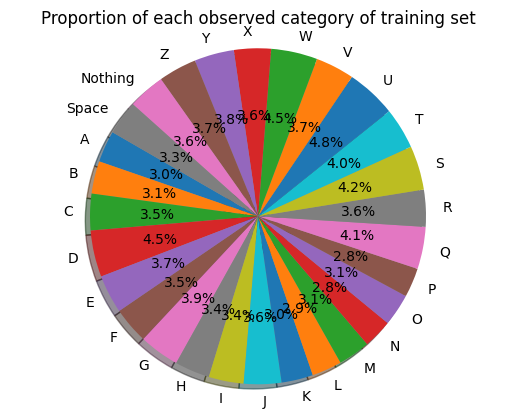

In [ ]:
sizes_trainset = []
for i in range(len(trainset)):
    sizes_trainset.append(len(os.listdir(trainset[i])))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes_trainset, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category of training set')
plt.show()

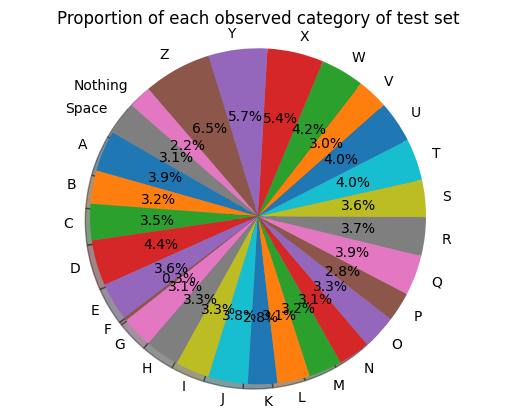

In [ ]:
sizes_testset = []
for i in range(len(testset)):
    sizes_testset.append(len(os.listdir(testset[i])))
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes_testset, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category of test set')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range =0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

BATCH_SIZE = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150
total_train_images = 0;
for i in range(len(trainset)):
    total_train_images += len(os.listdir(trainset[i]))

STEPS_PER_EPOCH = np.ceil(total_train_images/BATCH_SIZE)

training_set = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/ASL_Dataset/Train', #directory=str(data_dir)
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')


validation_set = validation_datagen.flow_from_directory(directory = '/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 5178 images belonging to 28 classes.
Found 1338 images belonging to 28 classes.
Found 1338 images belonging to 28 classes.


In [ ]:
pip install pyheif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 14.7 MB/s eta 0:00:00


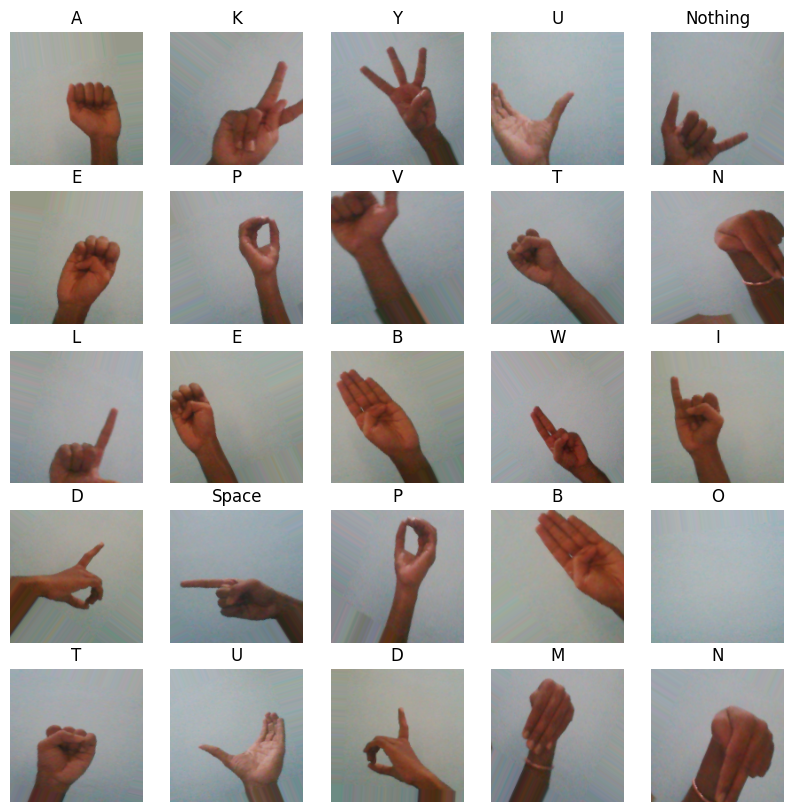

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(image_batch[i])
      for j in range(len(class_names)):
          if(label_batch[i][j]==1):
              plt.title(class_names[j])
              break;
      plt.axis('off')

image_batch, label_batch = next(training_set)
show_batch(image_batch, label_batch)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
#using Mobilenet V2
#base_model = keras.applications.mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(28, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Freeze layers up to the 249th layer
for layer in model.layers[:249]:
    layer.trainable = False

# Unfreeze layers from the 249th layer onwards
for layer in model.layers[249:]:
    layer.trainable = True

# Compile the model with RMSprop optimizer and low learning rate
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])

# Set up the Early Stopping callback
early_stopping = EarlyStopping(patience=5)

# Training parameters
STEPS_PER_EPOCH = 100  # You can adjust this based on your dataset size and batch size
NUM_EPOCHS = 20

try:
    history = model.fit_generator(generator=training_set,
                                  steps_per_epoch=STEPS_PER_EPOCH,
                                  epochs=NUM_EPOCHS,
                                  validation_data=validation_set,
                                  callbacks=[early_stopping])
except Exception as e:
    print("Exception during training:", e)


<ipython-input-23-e1881efdb800>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


Epoch 1/20
100/100 [==============================] - 309s 3s/step - loss: 0.3574 - precision_3: 0.9271 - recall_3: 0.8896 - accuracy: 0.9092 - val_loss: 0.1970 - val_precision_3: 0.9586 - val_recall_3: 0.9507 - val_accuracy: 0.9522
Epoch 2/20
100/100 [==============================] - 312s 3s/step - loss: 0.2322 - precision_3: 0.9481 - recall_3: 0.9280 - accuracy: 0.9364 - val_loss: 0.1403 - val_precision_3: 0.9648 - val_recall_3: 0.9641 - val_accuracy: 0.9649
Epoch 3/20
100/100 [==============================] - 305s 3s/step - loss: 0.2372 - precision_3: 0.9468 - recall_3: 0.9270 - accuracy: 0.9362 - val_loss: 1.3022 - val_precision_3: 0.8703 - val_recall_3: 0.8677 - val_accuracy: 0.8692
Epoch 4/20
100/100 [==============================] - 313s 3s/step - loss: 0.1785 - precision_3: 0.9587 - recall_3: 0.9376 - accuracy: 0.9452 - val_loss: 0.0634 - val_precision_3: 0.9880 - val_recall_3: 0.9873 - val_accuracy: 0.9873
Epoch 5/20
100/100 [==============================] - 312s 3s/step -

In [ ]:
print("Evaluate on test data")
test_loss, test_precision, test_recall,  test_accuracy  = model.evaluate(validation_set, verbose=0)
print("Test Loss: {0:.2f}, Test Precision: {1:.2f}, Test Recall: {2:.2f}, Test Accuracy: {3:.2f}%".format(test_loss,test_precision,test_recall, test_accuracy*100))

Evaluate on test data
Test Loss: 0.05, Test Precision: 0.99, Test Recall: 0.99, Test Accuracy: 99.03%


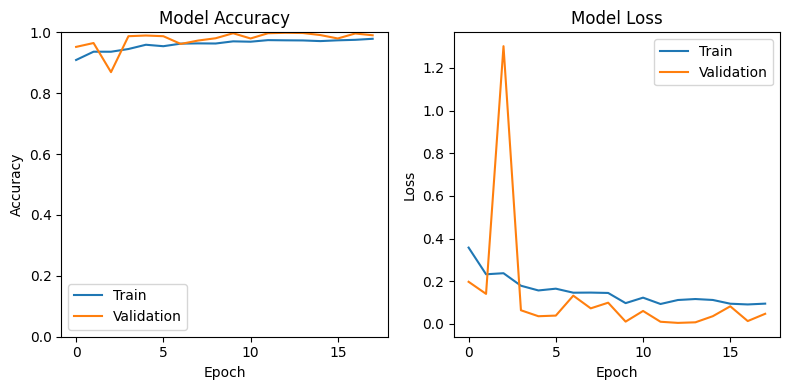

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#plot training and validation accuracy values
axes[0].set_ylim(0,1)
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#predict model
y_pred = model.predict(validation_set)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
batch_size = 100
target_names = ['free', 'diseases']

import sklearn.metrics as metrics
print('Confusion Matrix')
cm = metrics.confusion_matrix(validation_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(validation_set.classes, y_pred))

54/54 [==============================] - 72s 1s/step
[ 2 26 26 ... 25  2 25]
Confusion Matrix
[[0 1 4 2 4 0 3 1 0 0 1 2 1 3 0 2 1 0 1 4 5 1 1 2 3 5 5 1]
 [1 1 0 1 3 0 2 0 2 1 2 1 0 2 1 2 1 2 1 1 3 0 3 2 3 1 4 2]
 [0 1 1 5 1 1 3 0 3 2 1 1 0 1 0 1 1 1 2 1 1 2 1 4 2 4 2 4]
 [3 2 1 2 2 0 5 4 2 3 2 1 0 1 2 0 1 0 0 4 2 4 3 1 4 2 5 2]
 [2 1 2 3 3 0 1 1 0 0 2 1 2 2 3 3 1 1 2 2 0 2 2 1 2 2 3 4]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 1 0 3 2 0 2 1 0 4 1 1 2 1 2 1 0 1 0 0 1 5 1 2 1 6 1 0]
 [3 1 2 1 2 1 1 1 0 1 2 0 3 1 0 2 1 1 2 1 1 0 3 0 4 0 3 7]
 [3 1 1 1 5 0 1 3 2 1 1 2 0 1 2 0 1 1 1 4 1 1 1 0 2 1 3 4]
 [1 1 4 2 0 0 2 0 4 2 2 1 0 1 0 2 0 1 3 4 1 3 1 1 6 3 3 3]
 [0 2 1 3 0 1 0 1 1 2 1 0 2 0 1 0 1 4 2 3 0 2 2 1 0 3 2 2]
 [3 3 4 1 1 0 0 0 0 1 2 3 2 1 2 2 3 3 1 0 0 1 1 0 1 1 3 3]
 [1 0 2 2 3 0 1 2 2 1 1 0 4 1 2 1 0 2 4 1 5 1 1 1 1 2 0 2]
 [2 0 0 2 2 0 1 2 1 1 1 2 3 1 4 1 3 4 2 1 0 1 0 0 1 3 2 1]
 [0 1 0 1 4 0 1 0 2 2 1 0 2 2 0 1 2 1 1 0 1 1 1 2 0 2 0 2]
 [2 1 3 0 1 0 2 1 2 2

In [ ]:
import numpy as np
import sklearn.metrics as metrics

def sensitivity(TPR):
    return np.mean(TPR)

def specificity(TNR):
    return np.mean(TNR)

def precision(PPV):
    return np.mean(PPV)

# Assuming you have already defined 'y_true' and 'y_pred' variables
# 'y_true' contains the true class labels and 'y_pred' contains the predicted class labels

# Sample data (replace this with your actual data)
y_true = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = len(y_true) - (FP + FN + TP)

# Calculate sensitivity (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate specificity (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate precision (Positive Predictive Value)
PPV = TP / (TP + FP)

# Calculate false positive rate (False Alarm Rate)
FPR = FP / (FP + TN)

# Calculate false negative rate (Miss Rate)
FNR = FN / (FN + TP)

# Calculate negative predictive value
NPV = TN / (TN + FN)

# Calculate false discovery rate
FDR = FP / (FP + TP)

# Calculate F1 score
F1 = 2 * TP / (2 * TP + FP + FN)

ACC = (TP + TN) / (TP + FP + FN + TN)

# Calculate mean absolute error
MAE = metrics.mean_absolute_error(y_true, y_pred)

# Calculate root mean squared error
RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

# Print the results
print("Rec=   {:.2f}".format(sensitivity(TPR) * 100))
print("Spe=   {:.2f}".format(specificity(TNR) * 100))
print("Pre=   {:.2f}".format(precision(PPV) * 100))
print("FPR=   {:.2f}".format(np.mean(FPR) * 100))
print("FNR=   {:.2f}".format(np.mean(FNR) * 100))
print("NPV=   {:.2f}".format(np.mean(NPV) * 100))
print("FDR=   {:.2f}".format(np.mean(FDR) * 100))
print("F1=    {:.2f}".format(np.mean(F1) * 100))
print("ACC=   {:.2f}".format(np.mean(ACC) * 100))
print("MAE=   {:.2f}".format(MAE * 100))
print("RMSE=  {:.2f}".format(RMSE * 100))

Rec=   50.00
Spe=   50.00
Pre=   50.00
FPR=   50.00
FNR=   50.00
NPV=   50.00
FDR=   50.00
F1=    49.49
ACC=   50.00
MAE=   50.00
RMSE=  70.71
